In [1]:
import math
import random 
import collections
import numpy as np

import nest_asyncio
import tensorflow as tf
import tensorflow_federated as tff
import seaborn as sns

from tensorflow.keras import activations
from statistics import mean
from collections import Counter

from tqdm.notebook import tqdm as tqdm_notebook

import seaborn as sns
from matplotlib import pyplot as plt

from math import sqrt

sns.set_theme(style= 'whitegrid')
nest_asyncio.apply()
tff.backends.reference.set_reference_context()

### Data augmentation

In [2]:
from random import randint, choice, shuffle
from math import ceil
from itertools import chain

In [3]:
feature_space = {
'class1':[ range(randint(0, 15),randint(1000, 2000)),
              range(randint(10, 25),randint(2000, 3000)),
              range(randint(20, 35),randint(3000, 4000)),
              range(randint(30, 45),randint(4000, 5000)),
              range(randint(40, 55),randint(5000, 6000)),
              range(randint(50, 65),randint(6000, 7000)),
              range(randint(60, 75),randint(7000, 8000)),
              range(randint(70, 85),randint(8000, 9000)),
              range(randint(80, 95),randint(9000, 10000)),
              range(randint(90, 105),randint(10000, 11000))],
    
 'class2':[range(randint(10, 25),randint(1500, 2500)),
              range(randint(20, 35),randint(2500, 3500)),
              range(randint(30, 45),randint(3500, 4500)),
              range(randint(40, 55),randint(4500, 5500)),
              range(randint(50, 65),randint(5500, 6500)),
              range(randint(60, 75),randint(6500, 7500)),
              range(randint(70, 85),randint(7500, 8500)),
              range(randint(80, 95),randint(8500, 9500)),
              range(randint(90, 105),randint(9500, 10500)),
              range(randint(100, 115),randint(10500, 11500))],
    
    
'class3':[range(randint(20, 35),randint(2000, 3000)),
              range(randint(30, 45),randint(3000, 4000)),
              range(randint(40, 55),randint(4000, 5000)),
              range(randint(50, 65),randint(5000, 6000)),
              range(randint(60, 75),randint(6000, 7000)),
              range(randint(70, 85),randint(7000, 8000)),
              range(randint(80, 95),randint(8000, 90000)),
              range(randint(90, 105),randint(9000, 10000)),
              range(randint(100, 115),randint(10000, 11000)),
              range(randint(110, 125),randint(11000, 12000))],
    
'class4':[range(randint(30, 45),randint(2500, 3500)),
              range(randint(40, 55),randint(3500, 4500)),
              range(randint(50, 65),randint(4500, 5500)),
              range(randint(60, 75),randint(5500, 6500)),
              range(randint(70, 85),randint(6500, 7500)),
              range(randint(80, 95),randint(7500, 8500)),
              range(randint(90, 105),randint(8500, 9500)),
              range(randint(100, 115),randint(9500, 10500)),
              range(randint(110, 125),randint(10500, 11500)),
              range(randint(120, 135),randint(11500, 12500))],
    
'class5':[range(randint(40, 55),randint(3000, 4000)),
              range(randint(50, 65),randint(4000, 5000)),
              range(randint(60, 75),randint(5000, 6000)),
              range(randint(70, 85),randint(6000, 7000)),
              range(randint(80, 95),randint(7000, 8000)),
              range(randint(90, 105),randint(8000, 9000)),
              range(randint(100, 115),randint(9000, 10000)),
              range(randint(110, 125),randint(10000, 11000)),
              range(randint(120, 135),randint(11000, 12000)),
              range(randint(130, 145),randint(12000, 13000))],
    
'class6':[range(randint(50, 65),randint(3500, 4500)),
              range(randint(60, 75),randint(4500, 5500)),
              range(randint(70, 85),randint(5500, 6500)),
              range(randint(80, 95),randint(6500, 7500)),
              range(randint(90, 105),randint(7500, 8500)),
              range(randint(100, 115),randint(8500, 9500)),
              range(randint(110, 125),randint(9500, 10500)),
              range(randint(120, 135),randint(10500, 11500)),
              range(randint(130, 145),randint(11500, 12500)),
              range(randint(140, 155),randint(12500, 13500))],
    
'class7':[range(randint(60, 75),randint(4000, 5000)),
              range(randint(70, 85),randint(5000, 6000)),
              range(randint(80, 95),randint(6000, 7000)),
              range(randint(90, 105),randint(7000, 8000)),
              range(randint(100, 115),randint(8000, 9000)),
              range(randint(110, 125),randint(9000, 10000)),
              range(randint(120, 135),randint(10000, 11000)),
              range(randint(130, 145),randint(11000, 12000)),
              range(randint(140, 155),randint(12000, 13000)),
              range(randint(150, 165),randint(13000, 14000))],
    
'class8':[range(randint(70, 85),randint(4500, 5500)),
              range(randint(80, 95),randint(5500, 6500)),
              range(randint(90, 105),randint(6500, 7500)),
              range(randint(100, 115),randint(7500, 8500)),
              range(randint(110, 125),randint(8500, 9500)),
              range(randint(120, 135),randint(9500, 10500)),
              range(randint(130, 145),randint(10500, 11500)),
              range(randint(140, 155),randint(11500, 12500)),
              range(randint(150, 165),randint(12500, 13500)),
              range(randint(160, 175),randint(13500, 14500))],
    
'class9':[range(randint(80, 95),randint(5000, 6000)),
              range(randint(90, 105),randint(6000, 7000)),
              range(randint(100, 115),randint(7000, 8000)),
              range(randint(110, 125),randint(8000, 9000)),
              range(randint(120, 135),randint(9000, 10000)),
              range(randint(130, 145),randint(10000, 11000)),
              range(randint(140, 155),randint(11000, 12000)),
              range(randint(150, 165),randint(12000, 13000)),
              range(randint(160, 175),randint(13000, 14000)),
              range(randint(170, 185),randint(14000, 15000))],
    
'class10':[range(randint(90, 105),randint(5500, 6500)),
              range(randint(100, 115),randint(6500, 7500)),
              range(randint(110, 125),randint(7500, 8500)),
              range(randint(120, 135),randint(8500, 9500)),
              range(randint(130, 145),randint(9500, 10500)),
              range(randint(140, 155),randint(10500, 11500)),
              range(randint(150, 165),randint(11500, 12500)),
              range(randint(160, 175),randint(12500, 13500)),
              range(randint(170, 185),randint(13500, 14500)),
              range(randint(180, 195),randint(14500, 15500))],
    
}

def datapicker(fs, numodpoints):
    data = {}
    for i in fs:
        temp = []
        for ii in range(numodpoints):
            point = []
            for iii in fs.get(i):
                point.append(choice(iii))
            temp.append(point)
        data[i]=temp
    return data

In [4]:
DATAPOINTS = 10000
data = datapicker(feature_space,DATAPOINTS)

In [5]:
#Normalize columns of pandas data frame
# data = data.iloc[:,:].apply(lambda x: x/x.max(), axis=0)

In [6]:
# data.head(1)

In [7]:
def convert(lst,cls):
    LIST = lst[:]
    LIST.append(int(cls[-1:]))
    return LIST

In [8]:
def newDATA(data):
    return(list(map(lambda x:x+[1],data.get('class1'))),
           list(map(lambda x:x+[2],data.get('class2'))),
           list(map(lambda x:x+[3],data.get('class3'))),
           list(map(lambda x:x+[4],data.get('class4'))),
           list(map(lambda x:x+[5],data.get('class5'))),
           list(map(lambda x:x+[6],data.get('class6'))),
           list(map(lambda x:x+[7],data.get('class7'))),
           list(map(lambda x:x+[8],data.get('class8'))),
           list(map(lambda x:x+[9],data.get('class9'))),
           list(map(lambda x:x+[10],data.get('class10')))
          )

In [9]:
from random import randint
from math import ceil

In [10]:
def createClientsDATA(data):
    class1 = data.get('class1')
    class2 = data.get('class2')
    class3 = data.get('class3')
    class4 = data.get('class4')
    class5 = data.get('class5')
    class6 = data.get('class6')
    class7 = data.get('class7')
    class8 = data.get('class8')
    class9 = data.get('class9')
    class10 = data.get('class10')


    class1_1, class1_2, class1_3, class1_4, class1_5, class1_6, class1_7, class1_8, class1_9, class1_10 = [class1[:6400],class1[6400:6800],class1[6800:7200],class1[7200:7600],class1[7600:8000],class1[8000:8400],class1[8400:8800],class1[8800:9200],class1[9200:9600], class1[9600:]]
    class2_1, class2_2, class2_3, class2_4, class2_5, class2_6, class2_7, class2_8, class2_9, class2_10 = [class2[:6400],class2[6400:6800],class2[6800:7200],class2[7200:7600],class2[7600:8000],class2[8000:8400],class2[8400:8800],class2[8800:9200],class2[9200:9600], class2[9600:]]
    class3_1, class3_2, class3_3, class3_4, class3_5, class3_6, class3_7, class3_8, class3_9, class3_10 = [class3[:6400],class3[6400:6800],class3[6800:7200],class3[7200:7600],class3[7600:8000],class3[8000:8400],class3[8400:8800],class3[8800:9200],class3[9200:9600], class3[9600:]]
    class4_1, class4_2, class4_3, class4_4, class4_5, class4_6, class4_7, class4_8, class4_9, class4_10 = [class4[:6400],class4[6400:6800],class4[6800:7200],class4[7200:7600],class4[7600:8000],class4[8000:8400],class4[8400:8800],class4[8800:9200],class4[9200:9600], class4[9600:]]
    class5_1, class5_2, class5_3, class5_4, class5_5, class5_6, class5_7, class5_8, class5_9, class5_10 = [class5[:6400],class5[6400:6800],class5[6800:7200],class5[7200:7600],class5[7600:8000],class5[8000:8400],class5[8400:8800],class5[8800:9200],class5[9200:9600], class5[9600:]]
    class6_1, class6_2, class6_3, class6_4, class6_5, class6_6, class6_7, class6_8, class6_9, class6_10 = [class6[:6400],class6[6400:6800],class6[6800:7200],class6[7200:7600],class6[7600:8000],class6[8000:8400],class6[8400:8800],class6[8800:9200],class6[9200:9600], class6[9600:]]
    class7_1, class7_2, class7_3, class7_4, class7_5, class7_6, class7_7, class7_8, class7_9, class7_10 = [class7[:6400],class7[6400:6800],class7[6800:7200],class7[7200:7600],class7[7600:8000],class7[8000:8400],class7[8400:8800],class7[8800:9200],class7[9200:9600], class7[9600:]]
    class8_1, class8_2, class8_3, class8_4, class8_5, class8_6, class8_7, class8_8, class8_9, class8_10 = [class8[:6400],class8[6400:6800],class8[6800:7200],class8[7200:7600],class8[7600:8000],class8[8000:8400],class8[8400:8800],class8[8800:9200],class8[9200:9600], class8[9600:]]
    class9_1, class9_2, class9_3, class9_4, class9_5, class9_6, class9_7, class9_8, class9_9, class9_10 = [class9[:6400],class9[6400:6800],class9[6800:7200],class9[7200:7600],class9[7600:8000],class9[8000:8400],class9[8400:8800],class9[8800:9200],class9[9200:9600], class9[9600:]]
    class10_1, class10_2, class10_3, class10_4, class10_5, class10_6, class10_7, class10_8, class10_9, class10_10 = [class10[:6400],class10[6400:6800],class10[6800:7200],class10[7200:7600],class10[7600:8000],class10[8000:8400],class10[8400:8800],class10[8800:9200],class10[9200:9600], class10[9600:]]
    
    client1  = list(map(lambda x:x+[1],class1_1)) + list(map(lambda x:x+[2],class2_2)) + list(map(lambda x:x+[3],class3_2)) + list(map(lambda x:x+[4],class4_2)) + list(map(lambda x:x+[5],class5_2)) + list(map(lambda x:x+[6],class6_2)) + list(map(lambda x:x+[7],class7_2)) +  list(map(lambda x:x+[8],class8_2)) + list(map(lambda x:x+[9],class9_2)) + list(map(lambda x:x+[10],class10_2))
    client2  = list(map(lambda x:x+[1],class1_2)) + list(map(lambda x:x+[2],class2_1)) + list(map(lambda x:x+[3],class3_3)) + list(map(lambda x:x+[4],class4_3)) + list(map(lambda x:x+[5],class5_3)) + list(map(lambda x:x+[6],class6_3)) + list(map(lambda x:x+[7],class7_3)) +  list(map(lambda x:x+[8],class8_3)) + list(map(lambda x:x+[9],class9_3)) + list(map(lambda x:x+[10],class10_3))
    client3  = list(map(lambda x:x+[1],class1_3)) + list(map(lambda x:x+[2],class2_3)) + list(map(lambda x:x+[3],class3_1)) + list(map(lambda x:x+[4],class4_4)) + list(map(lambda x:x+[5],class5_4)) + list(map(lambda x:x+[6],class6_4)) + list(map(lambda x:x+[7],class7_4)) +  list(map(lambda x:x+[8],class8_4)) + list(map(lambda x:x+[9],class9_4)) + list(map(lambda x:x+[10],class10_4))
    client4  = list(map(lambda x:x+[1],class1_4)) + list(map(lambda x:x+[2],class2_4)) + list(map(lambda x:x+[3],class3_4)) + list(map(lambda x:x+[4],class4_1)) + list(map(lambda x:x+[5],class5_5)) + list(map(lambda x:x+[6],class6_5)) + list(map(lambda x:x+[7],class7_5)) +  list(map(lambda x:x+[8],class8_5)) + list(map(lambda x:x+[9],class9_5)) + list(map(lambda x:x+[10],class10_5))
    client5  = list(map(lambda x:x+[1],class1_5)) + list(map(lambda x:x+[2],class2_5)) + list(map(lambda x:x+[3],class3_5)) + list(map(lambda x:x+[4],class4_5)) + list(map(lambda x:x+[5],class5_1)) + list(map(lambda x:x+[6],class6_6)) + list(map(lambda x:x+[7],class7_6)) +  list(map(lambda x:x+[8],class8_6)) + list(map(lambda x:x+[9],class9_6)) + list(map(lambda x:x+[10],class10_6))
    client6  = list(map(lambda x:x+[1],class1_6)) + list(map(lambda x:x+[2],class2_6)) + list(map(lambda x:x+[3],class3_6)) + list(map(lambda x:x+[4],class4_6)) + list(map(lambda x:x+[5],class5_6)) + list(map(lambda x:x+[6],class6_1)) + list(map(lambda x:x+[7],class7_7)) +  list(map(lambda x:x+[8],class8_7)) + list(map(lambda x:x+[9],class9_7)) + list(map(lambda x:x+[10],class10_7))
    client7  = list(map(lambda x:x+[1],class1_7)) + list(map(lambda x:x+[2],class2_7)) + list(map(lambda x:x+[3],class3_7)) + list(map(lambda x:x+[4],class4_7)) + list(map(lambda x:x+[5],class5_7)) + list(map(lambda x:x+[6],class6_7)) + list(map(lambda x:x+[7],class7_1)) +  list(map(lambda x:x+[8],class8_8)) + list(map(lambda x:x+[9],class9_8)) + list(map(lambda x:x+[10],class10_8))
    client8  = list(map(lambda x:x+[1],class1_8)) + list(map(lambda x:x+[2],class2_8)) + list(map(lambda x:x+[3],class3_8)) + list(map(lambda x:x+[4],class4_8)) + list(map(lambda x:x+[5],class5_8)) + list(map(lambda x:x+[6],class6_8)) + list(map(lambda x:x+[7],class7_8)) +  list(map(lambda x:x+[8],class8_1)) + list(map(lambda x:x+[9],class9_9)) + list(map(lambda x:x+[10],class10_9))
    client9  = list(map(lambda x:x+[1],class1_9)) + list(map(lambda x:x+[2],class2_9)) + list(map(lambda x:x+[3],class3_9)) + list(map(lambda x:x+[4],class4_9)) + list(map(lambda x:x+[5],class5_9)) + list(map(lambda x:x+[6],class6_9)) + list(map(lambda x:x+[7],class7_9)) +  list(map(lambda x:x+[8],class8_9)) + list(map(lambda x:x+[9],class9_1)) + list(map(lambda x:x+[10],class10_10))
    client10  = list(map(lambda x:x+[1],class1_10)) + list(map(lambda x:x+[2],class2_10)) + list(map(lambda x:x+[3],class3_10)) + list(map(lambda x:x+[4],class4_10)) + list(map(lambda x:x+[5],class5_10)) + list(map(lambda x:x+[6],class6_10)) + list(map(lambda x:x+[7],class7_10)) +  list(map(lambda x:x+[8],class8_10)) + list(map(lambda x:x+[9],class9_10)) + list(map(lambda x:x+[10],class10_1))
    
    return [client1,client2,client3,client4,client5,client6,client7,client8,client9,client10]


    


In [11]:
def createClients():
    class1 = data.get('class1')
    class2 = data.get('class2')
    class3 = data.get('class3')
    class4 = data.get('class4')
    class5 = data.get('class5')

    class1_1, class1_2, class1_3, class1_4, class1_5, class1_6 = [class1[:4000],class1[4000:8000],class1[8000:8500],class1[8500:9000], 
                                                                  class1[9000:9500],class1[9500:]]
    class2_1, class2_2, class2_3, class2_4, class2_5, class2_6 = [class2[:4000],class2[4000:8000],class2[8000:8500],class2[8500:9000], 
                                                                  class2[9000:9500],class2[9500:]]
    class3_1, class3_2, class3_3, class3_4, class3_5, class3_6 = [class3[:4000],class3[4000:8000],class3[8000:8500],class3[8500:9000], 
                                                                  class3[9000:9500],class3[9500:]]
    class4_1, class4_2, class4_3, class4_4, class4_5, class4_6 = [class4[:4000],class4[4000:8000],class4[8000:8500],class4[8500:9000], 
                                                                  class4[9000:9500],class4[9500:]]
    class5_1, class5_2, class5_3, class5_4, class5_5, class5_6 = [class5[:4000],class5[4000:8000],class5[8000:8500],class5[8500:9000], 
                                                                  class5[9000:9500],class5[9500:]]

    client1  = list(map(lambda x:x+[1],class1_1)) + list(map(lambda x:x+[4],class4_3)) + list(map(lambda x:x+[5],class5_3))
    client2  = list(map(lambda x:x+[1],class1_3)) + list(map(lambda x:x+[2],class2_3)) + list(map(lambda x:x+[3],class3_1))
    client3  = list(map(lambda x:x+[1],class1_2)) + list(map(lambda x:x+[3],class3_3)) + list(map(lambda x:x+[4],class4_4))
    client4  = list(map(lambda x:x+[3],class3_2)) + list(map(lambda x:x+[4],class4_5)) + list(map(lambda x:x+[5],class5_4))
    client5  = list(map(lambda x:x+[2],class2_4)) + list(map(lambda x:x+[4],class4_1)) + list(map(lambda x:x+[5],class5_5))
    client6  = list(map(lambda x:x+[1],class1_4)) + list(map(lambda x:x+[2],class2_1)) + list(map(lambda x:x+[3],class3_5))
    client7  = list(map(lambda x:x+[2],class2_5)) + list(map(lambda x:x+[4],class4_6)) + list(map(lambda x:x+[5],class5_1))
    client8  = list(map(lambda x:x+[2],class2_6)) + list(map(lambda x:x+[4],class4_2)) + list(map(lambda x:x+[5],class5_6))
    client9  = list(map(lambda x:x+[1],class1_5)) + list(map(lambda x:x+[2],class2_2)) + list(map(lambda x:x+[3],class3_5))
    client10 = list(map(lambda x:x+[1],class1_6)) + list(map(lambda x:x+[3],class3_6)) + list(map(lambda x:x+[5],class5_2))

    return [client1,client2,client3,client4,client5,client6,client7,client8,client9,client10]


In [12]:
def clientDATA(numofclient,data):
    clients = {}
    for i in range(numofclient):
        mjc = set()
        
        cls = choice(list(data.keys()))
        
        mjc.add(cls)
        
        oc = set(data.keys())-mjc

        mjv = randint(75,80)

        ocv = randint(mjv//10, (mjv//10)+15)

        mjdata = data.get(mjc.pop())

        rslt = list(map(lambda x:convert(x,cls) , mjdata[:ceil(len(mjdata)*mjv/100)]))+list(chain.from_iterable(list(map(lambda x:list(map(lambda y:convert(y,x) , mjdata[:ceil(len(mjdata)*ocv/100)])),oc))))
        
        clients[i] = rslt
    return clients

In [13]:
# D1

In [14]:
# CLIENT1, CLIENT2, CLIENT3, CLIENT4, CLIENT5, CLIENT6, CLIENT7, CLIENT8, CLIENT9, CLIENT10,= clientDATA(10,data).values()
# DIM = 5

In [15]:
# D2

In [16]:
# CLIENT1, CLIENT2, CLIENT3, CLIENT4, CLIENT5, CLIENT6, CLIENT7, CLIENT8, CLIENT9, CLIENT10,= createClients()
# DIM = 3

In [17]:
# D3

In [18]:
# CLIENT1, CLIENT2, CLIENT3, CLIENT4, CLIENT5, CLIENT6, CLIENT7, CLIENT8, CLIENT9, CLIENT10,= newDATA(data)
# DIM = 1

In [19]:
# D4

In [20]:
CLIENT1, CLIENT2, CLIENT3, CLIENT4, CLIENT5, CLIENT6, CLIENT7, CLIENT8, CLIENT9, CLIENT10,= createClientsDATA(data)
DIM = 10

### Clients Data

In [21]:
def get_batches(HOLDER):
    federated_data = []
    for i in HOLDER:
        client = []
        for index in range(len(i)//100):
            X= []
            Y= []
            for elements in i[index*100:index*100+100]:
                X.append(np.array([np.float32(elements[0]/10000),
                                   np.float32(elements[1]/10000),
                                   np.float32(elements[2]/10000),
                                   np.float32(elements[3]/10000),
                                   np.float32(elements[4]/10000),
                                   np.float32(elements[5]/10000),
                                   np.float32(elements[6]/10000),
                                   np.float32(elements[7]/10000),
                                   np.float32(elements[8]/10000),
                                   np.float32(elements[9]/10000),
                                  ]))
                Y.append(np.array(np.int32(elements[10])))
            client.append({
                'x':np.array(X),
                'y':np.array(Y)
            })
        federated_data.append(client)
    return federated_data

In [22]:
def poissonDistributiondata(clientData):
    data = random.sample(clientData,2000)
    return [data[:1000],data[1000:1500],data[1500:]]

In [23]:
def reselectClientData():
    c1_tra, c1_val, c1_test = poissonDistributiondata(CLIENT1)
    c2_tra, c2_val, c2_test = poissonDistributiondata(CLIENT2)
    c3_tra, c3_val, c3_test = poissonDistributiondata(CLIENT3)
    c4_tra, c4_val, c4_test = poissonDistributiondata(CLIENT4)
    c5_tra, c5_val, c5_test = poissonDistributiondata(CLIENT5)
    c6_tra, c6_val, c6_test = poissonDistributiondata(CLIENT6)
    c7_tra, c7_val, c7_test = poissonDistributiondata(CLIENT7)
    c8_tra, c8_val, c8_test = poissonDistributiondata(CLIENT8)
    c9_tra, c9_val, c9_test = poissonDistributiondata(CLIENT9)
    c10_tra, c10_val, c10_test = poissonDistributiondata(CLIENT10)

    train = [c1_tra,   c2_tra,  c3_tra, c4_tra,   c5_tra,  c6_tra, c7_tra,   c8_tra,  c9_tra, c10_tra]
    val   = [c1_val,   c2_val,  c3_val, c4_val,   c5_val,  c6_val, c7_val,   c8_val,  c9_val, c10_val]
    test  = [c1_test,  c2_test, c3_test, c4_test, c5_test, c6_test, c7_test, c8_test, c9_test, c10_test]

    federated_train_data      =  get_batches(train)
    federated_validation_data =  get_batches(val)
    federated_test_data       =  get_batches(test)
    
    #count
    ARR.append([Counter(list(map(lambda x: x[-1], c1_tra))), 
                Counter(list(map(lambda x: x[-1], c2_tra))), 
                Counter(list(map(lambda x: x[-1], c3_tra))),
                Counter(list(map(lambda x: x[-1], c4_tra))), 
                Counter(list(map(lambda x: x[-1], c5_tra))), 
                Counter(list(map(lambda x: x[-1], c6_tra))),
                Counter(list(map(lambda x: x[-1], c7_tra))), 
                Counter(list(map(lambda x: x[-1], c8_tra))), 
                Counter(list(map(lambda x: x[-1], c9_tra))),
                Counter(list(map(lambda x: x[-1], c10_tra)))])
    #mean
    
    return (federated_train_data,federated_validation_data,federated_test_data)

In [54]:
len(federated_test_data[0][0])

2

In [24]:
if all([None]) : 
    print(1)
else:
    print(3)

3


In [25]:
def get_mean(arr_history):
    client1_means  = [i[0] for i in arr_history]
    client2_means  = [i[1] for i in arr_history]
    client3_means  = [i[2] for i in arr_history]
    client4_means  = [i[3] for i in arr_history]
    client5_means  = [i[4] for i in arr_history]
    client6_means  = [i[5] for i in arr_history]
    client7_means  = [i[6] for i in arr_history]
    client8_means  = [i[7] for i in arr_history]
    client9_means  = [i[8] for i in arr_history]
    client10_means = [i[9] for i in arr_history]
    
    client1_means_vals_c1 = [0]
    client1_means_vals_c2 = [0]    
    client1_means_vals_c3 = [0]
    client1_means_vals_c4 = [0]    
    client1_means_vals_c5 = [0] 
    
    client2_means_vals_c1 = [0]
    client2_means_vals_c2 = [0]    
    client2_means_vals_c3 = [0]
    client2_means_vals_c4 = [0]    
    client2_means_vals_c5 = [0] 
    
    client3_means_vals_c1 = [0]
    client3_means_vals_c2 = [0]    
    client3_means_vals_c3 = [0]
    client3_means_vals_c4 = [0]    
    client3_means_vals_c5 = [0]
    
    client4_means_vals_c1 = [0]
    client4_means_vals_c2 = [0]    
    client4_means_vals_c3 = [0]
    client4_means_vals_c4 = [0]    
    client4_means_vals_c5 = [0] 
    
    client5_means_vals_c1 = [0]
    client5_means_vals_c2 = [0]    
    client5_means_vals_c3 = [0]
    client5_means_vals_c4 = [0]    
    client5_means_vals_c5 = [0] 
    
    client6_means_vals_c1 = [0]
    client6_means_vals_c2 = [0]    
    client6_means_vals_c3 = [0]
    client6_means_vals_c4 = [0]    
    client6_means_vals_c5 = [0]
    
    client7_means_vals_c1 = [0]
    client7_means_vals_c2 = [0]    
    client7_means_vals_c3 = [0]
    client7_means_vals_c4 = [0]    
    client7_means_vals_c5 = [0]
    
    client8_means_vals_c1 = [0]
    client8_means_vals_c2 = [0]    
    client8_means_vals_c3 = [0]
    client8_means_vals_c4 = [0]    
    client8_means_vals_c5 = [0]
    
    client9_means_vals_c1 = [0]
    client9_means_vals_c2 = [0]    
    client9_means_vals_c3 = [0]
    client9_means_vals_c4 = [0]    
    client9_means_vals_c5 = [0]
    
    client10_means_vals_c1 = [0]
    client10_means_vals_c2 = [0]    
    client10_means_vals_c3 = [0]
    client10_means_vals_c4 = [0]    
    client10_means_vals_c5 = [0]
    
    client1_means_vals_c1 = [i.get(0) for i in client1_means]
    client1_means_vals_c2 = [i.get(1) for i in client1_means]    
    client1_means_vals_c3 = [i.get(2) for i in client1_means]
    client1_means_vals_c4 = [i.get(3) for i in client1_means]    
    client1_means_vals_c5 = [i.get(4) for i in client1_means]    
    
    client2_means_vals_c1 = [i.get(0) for i in client2_means]
    client2_means_vals_c2 = [i.get(1) for i in client2_means]    
    client2_means_vals_c3 = [i.get(2) for i in client2_means]
    client2_means_vals_c4 = [i.get(3) for i in client2_means]    
    client1_means_vals_c5 = [i.get(4) for i in client2_means]    
    
    client3_means_vals_c1 = [i.get(0) for i in client3_means]
    client3_means_vals_c2 = [i.get(1) for i in client3_means]    
    client3_means_vals_c3 = [i.get(2) for i in client3_means]
    client3_means_vals_c4 = [i.get(3) for i in client3_means]    
    client3_means_vals_c5 = [i.get(4) for i in client3_means]    
    
    client4_means_vals_c1 = [i.get(0) for i in client4_means]
    client4_means_vals_c2 = [i.get(1) for i in client4_means]    
    client4_means_vals_c3 = [i.get(2) for i in client4_means]
    client4_means_vals_c4 = [i.get(3) for i in client4_means]    
    client4_means_vals_c5 = [i.get(4) for i in client4_means]    
    
    client5_means_vals_c1 = [i.get(0) for i in client5_means]
    client5_means_vals_c2 = [i.get(1) for i in client5_means]    
    client5_means_vals_c3 = [i.get(2) for i in client5_means]
    client5_means_vals_c4 = [i.get(3) for i in client5_means]    
    client5_means_vals_c5 = [i.get(4) for i in client5_means]    
    
    client6_means_vals_c1 = [i.get(0) for i in client6_means]
    client6_means_vals_c2 = [i.get(1) for i in client6_means]    
    client6_means_vals_c3 = [i.get(2) for i in client6_means]
    client6_means_vals_c4 = [i.get(3) for i in client6_means]    
    client6_means_vals_c5 = [i.get(4) for i in client6_means] 
    
    client7_means_vals_c1 = [i.get(0) for i in client7_means]
    client7_means_vals_c2 = [i.get(1) for i in client7_means]    
    client7_means_vals_c3 = [i.get(2) for i in client7_means]
    client7_means_vals_c4 = [i.get(3) for i in client7_means]    
    client7_means_vals_c5 = [i.get(4) for i in client7_means]    
    
    client8_means_vals_c1 = [i.get(0) for i in client8_means]
    client8_means_vals_c2 = [i.get(1) for i in client8_means]    
    client8_means_vals_c3 = [i.get(2) for i in client8_means]
    client8_means_vals_c4 = [i.get(3) for i in client8_means]    
    client8_means_vals_c5 = [i.get(4) for i in client8_means]    
    
    client9_means_vals_c1 = [i.get(0) for i in client9_means]
    client9_means_vals_c2 = [i.get(1) for i in client9_means]    
    client9_means_vals_c3 = [i.get(2) for i in client9_means]
    client9_means_vals_c4 = [i.get(3) for i in client9_means]    
    client9_means_vals_c5 = [i.get(4) for i in client9_means] 
    
    client10_means_vals_c1 = [i.get(0) for i in client10_means]
    client10_means_vals_c2 = [i.get(1) for i in client10_means]    
    client10_means_vals_c3 = [i.get(2) for i in client10_means]
    client10_means_vals_c4 = [i.get(3) for i in client10_means]    
    client10_means_vals_c5 = [i.get(4) for i in client10_means]    
    
    if not all(client1_means_vals_c1) : client1_means_vals_c1 = [0]
    if not all(client1_means_vals_c2) : client1_means_vals_c2 = [0]   
    if not all(client1_means_vals_c3) : client1_means_vals_c3 = [0] 
    if not all(client1_means_vals_c4) : client1_means_vals_c4 = [0]  
    if not all(client1_means_vals_c5) : client1_means_vals_c5 = [0]     
        
    if not all(client2_means_vals_c1) : client2_means_vals_c1 = [0]
    if not all(client2_means_vals_c2) : client2_means_vals_c2 = [0]   
    if not all(client2_means_vals_c3) : client2_means_vals_c3 = [0] 
    if not all(client2_means_vals_c4) : client2_means_vals_c4 = [0]  
    if not all(client2_means_vals_c5) : client2_means_vals_c5 = [0] 
        
    if not all(client3_means_vals_c1) : client3_means_vals_c1 = [0]
    if not all(client3_means_vals_c2) : client3_means_vals_c2 = [0]   
    if not all(client3_means_vals_c3) : client3_means_vals_c3 = [0] 
    if not all(client3_means_vals_c4) : client3_means_vals_c4 = [0]  
    if not all(client3_means_vals_c5) : client3_means_vals_c5 = [0] 
        
    if not all(client4_means_vals_c1) : client4_means_vals_c1 = [0]
    if not all(client4_means_vals_c2) : client4_means_vals_c2 = [0]   
    if not all(client4_means_vals_c3) : client4_means_vals_c3 = [0] 
    if not all(client4_means_vals_c4) : client4_means_vals_c4 = [0]  
    if not all(client4_means_vals_c5) : client4_means_vals_c5 = [0] 
        
    if not all(client5_means_vals_c1) : client5_means_vals_c1 = [0]
    if not all(client5_means_vals_c2) : client5_means_vals_c2 = [0]   
    if not all(client5_means_vals_c3) : client5_means_vals_c3 = [0] 
    if not all(client5_means_vals_c4) : client5_means_vals_c4 = [0]  
    if not all(client5_means_vals_c5) : client5_means_vals_c5 = [0] 
        
    if not all(client6_means_vals_c1) : client6_means_vals_c1 = [0]
    if not all(client6_means_vals_c2) : client6_means_vals_c2 = [0]   
    if not all(client6_means_vals_c3) : client6_means_vals_c3 = [0] 
    if not all(client6_means_vals_c4) : client6_means_vals_c4 = [0]  
    if not all(client6_means_vals_c5) : client6_means_vals_c5 = [0] 
        
    if not all(client7_means_vals_c1) : client7_means_vals_c1 = [0]
    if not all(client7_means_vals_c2) : client7_means_vals_c2 = [0]   
    if not all(client7_means_vals_c3) : client7_means_vals_c3 = [0] 
    if not all(client7_means_vals_c4) : client7_means_vals_c4 = [0]  
    if not all(client7_means_vals_c5) : client7_means_vals_c5 = [0] 
        
    if not all(client8_means_vals_c1) : client8_means_vals_c1 = [0]
    if not all(client8_means_vals_c2) : client8_means_vals_c2 = [0]   
    if not all(client8_means_vals_c3) : client8_means_vals_c3 = [0] 
    if not all(client8_means_vals_c4) : client8_means_vals_c4 = [0]  
    if not all(client8_means_vals_c5) : client8_means_vals_c5 = [0] 
        
    if not all(client9_means_vals_c1) : client9_means_vals_c1 = [0]
    if not all(client9_means_vals_c2) : client9_means_vals_c2 = [0]   
    if not all(client9_means_vals_c3) : client9_means_vals_c3 = [0] 
    if not all(client9_means_vals_c4) : client9_means_vals_c4 = [0]  
    if not all(client9_means_vals_c5) : client9_means_vals_c5 = [0] 
        
    if not all(client10_means_vals_c1) : client10_means_vals_c1 = [0]
    if not all(client10_means_vals_c2) : client10_means_vals_c2 = [0]   
    if not all(client10_means_vals_c3) : client10_means_vals_c3 = [0] 
    if not all(client10_means_vals_c4) : client10_means_vals_c4 = [0]  
    if not all(client10_means_vals_c5) : client10_means_vals_c5 = [0] 
    
    return {
        'client1':{
            0: mean(client1_means_vals_c1),
            1: mean(client1_means_vals_c2),
            2: mean(client1_means_vals_c3),
            3: mean(client1_means_vals_c4),
            4: mean(client1_means_vals_c5)
        },
        'client2':{
            0: mean(client2_means_vals_c1),
            1: mean(client2_means_vals_c2),
            2: mean(client2_means_vals_c3),
            3: mean(client2_means_vals_c4),
            4: mean(client2_means_vals_c5)
        },
        'client3':{
            0: mean(client3_means_vals_c1),
            1: mean(client3_means_vals_c2),
            2: mean(client3_means_vals_c3),
            3: mean(client3_means_vals_c4),
            4: mean(client3_means_vals_c5)
        },
         'client4':{
            0: mean(client4_means_vals_c1),
            1: mean(client4_means_vals_c2),
            2: mean(client4_means_vals_c3),
            3: mean(client4_means_vals_c4),
            4: mean(client4_means_vals_c5)
        },
        'client5':{
            0: mean(client5_means_vals_c1),
            1: mean(client5_means_vals_c2),
            2: mean(client5_means_vals_c3),
            3: mean(client5_means_vals_c4),
            4: mean(client5_means_vals_c5)
        },
        'client6':{
            0: mean(client6_means_vals_c1),
            1: mean(client6_means_vals_c2),
            2: mean(client6_means_vals_c3),
            3: mean(client6_means_vals_c4),
            4: mean(client6_means_vals_c5)
        },
         'client7':{
            0: mean(client7_means_vals_c1),
            1: mean(client7_means_vals_c2),
            2: mean(client7_means_vals_c3),
            3: mean(client7_means_vals_c4),
            4: mean(client7_means_vals_c5)
        },
        'client8':{
            0: mean(client8_means_vals_c1),
            1: mean(client8_means_vals_c2),
            2: mean(client8_means_vals_c3),
            3: mean(client8_means_vals_c4),
            4: mean(client8_means_vals_c5)
        },
        'client9':{
            0: mean(client9_means_vals_c1),
            1: mean(client9_means_vals_c2),
            2: mean(client9_means_vals_c3),
            3: mean(client9_means_vals_c4),
            4: mean(client9_means_vals_c5)
        },
        'client10':{
            0: mean(client10_means_vals_c1),
            1: mean(client10_means_vals_c2),
            2: mean(client10_means_vals_c3),
            3: mean(client10_means_vals_c4),
            4: mean(client10_means_vals_c5)
        }
    }

####  Follow shows the get mean output
```get_mean(ARR)```

```{'client1': {0: 706.5, 1: 154, 2: 139.5},
 'client2': {0: 188, 1: 611, 2: 201},
 'client3': {0: 92, 1: 245, 2: 663}}```

#### Custom mean aggregation function goes here

In [26]:
def AGG_FUNCTION1(mean):
    return [
        np.float32(max(mean.get('client1').values())),
        np.float32(max(mean.get('client2').values())),
        np.float32(max(mean.get('client3').values())),
        np.float32(max(mean.get('client4').values())),
        np.float32(max(mean.get('client5').values())),
        np.float32(max(mean.get('client6').values())),
        np.float32(max(mean.get('client7').values())),
        np.float32(max(mean.get('client8').values())),
        np.float32(max(mean.get('client9').values())),
        np.float32(max(mean.get('client10').values()))
    ]

In [27]:
def AGG_FUNCTION2(mean):
    return [
        np.float32(min(mean.get('client1').values())),
        np.float32(min(mean.get('client2').values())),
        np.float32(min(mean.get('client3').values())),
        np.float32(min(mean.get('client4').values())),
        np.float32(min(mean.get('client5').values())),
        np.float32(min(mean.get('client6').values())),
        np.float32(min(mean.get('client7').values())),
        np.float32(min(mean.get('client8').values())),
        np.float32(min(mean.get('client9').values())),
        np.float32(min(mean.get('client10').values()))
    ]

In [28]:
def AGG_FUNCTION3(mean):
    return [
        np.float32(sum(mean.get('client1').values())),
        np.float32(sum(mean.get('client2').values())),
        np.float32(sum(mean.get('client3').values())),
        np.float32(sum(mean.get('client4').values())),
        np.float32(sum(mean.get('client5').values())),
        np.float32(sum(mean.get('client6').values())),
        np.float32(sum(mean.get('client7').values())),
        np.float32(sum(mean.get('client8').values())),
        np.float32(sum(mean.get('client9').values())),
        np.float32(sum(mean.get('client10').values()))
    ]

In [29]:
def AGG_FUNCTION4(mean):
    return [
        np.float32(sum(map(lambda x: x*x ,mean.get('client1').values()))),
        np.float32(sum(map(lambda x: x*x ,mean.get('client2').values()))),
        np.float32(sum(map(lambda x: x*x ,mean.get('client3').values()))),
        np.float32(sum(map(lambda x: x*x ,mean.get('client4').values()))),
        np.float32(sum(map(lambda x: x*x ,mean.get('client5').values()))),
        np.float32(sum(map(lambda x: x*x ,mean.get('client6').values()))),
        np.float32(sum(map(lambda x: x*x ,mean.get('client7').values()))),
        np.float32(sum(map(lambda x: x*x ,mean.get('client8').values()))),
        np.float32(sum(map(lambda x: x*x ,mean.get('client9').values()))),
        np.float32(sum(map(lambda x: x*x ,mean.get('client10').values())))
    ]

In [30]:
def AGG_FUNCTION5(mean):
    return [
        np.float32(sqrt(sum(map(lambda x: x*x ,mean.get('client1').values())))),
        np.float32(sqrt(sum(map(lambda x: x*x ,mean.get('client2').values())))),
        np.float32(sqrt(sum(map(lambda x: x*x ,mean.get('client3').values())))),
        np.float32(sqrt(sum(map(lambda x: x*x ,mean.get('client4').values())))),
        np.float32(sqrt(sum(map(lambda x: x*x ,mean.get('client5').values())))),
        np.float32(sqrt(sum(map(lambda x: x*x ,mean.get('client6').values())))),
        np.float32(sqrt(sum(map(lambda x: x*x ,mean.get('client7').values())))),
        np.float32(sqrt(sum(map(lambda x: x*x ,mean.get('client8').values())))),
        np.float32(sqrt(sum(map(lambda x: x*x ,mean.get('client9').values())))),
        np.float32(sqrt(sum(map(lambda x: x*x ,mean.get('client10').values()))))
    ]

In [31]:
def AGG_FUNCTION6():
    return [
        np.float32(random.uniform(1.1, 3.61)),
        np.float32(random.uniform(1.1, 3.61)),
        np.float32(random.uniform(1.1, 3.61)),
        np.float32(random.uniform(1.1, 3.61)),
        np.float32(random.uniform(1.1, 3.61)),
        np.float32(random.uniform(1.1, 3.61)),
        np.float32(random.uniform(1.1, 3.61)),
        np.float32(random.uniform(1.1, 3.61)),
        np.float32(random.uniform(1.1, 3.61)),
        np.float32(random.uniform(1.1, 3.61)),
    ]

In [32]:
len(AGG_FUNCTION6())

10

### Federated Data Types [Client and Server]

In [33]:
BATCH_SPEC = collections.OrderedDict(x=tf.TensorSpec(shape=[None, 10], dtype=tf.float32),
                                     y=tf.TensorSpec(shape=[None], dtype=tf.int32))
BATCH_TYPE = tff.to_type(BATCH_SPEC)


MODEL_SPEC = collections.OrderedDict(weights=tf.TensorSpec(shape=[10, DIM], dtype=tf.float32),
                                     bias=tf.TensorSpec(shape=[DIM], dtype=tf.float32))
MODEL_TYPE = tff.to_type(MODEL_SPEC)


WEIGHT_SPEC = tff.TensorType(dtype=tf.float32, shape=None)
WEIGHT_TYPE = tff.to_type(WEIGHT_SPEC)
WEIGHT_DATA_TYPE = tff.FederatedType(WEIGHT_TYPE, tff.CLIENTS)

### Federated Client

In [34]:
@tf.function
def forward_pass(model, batch):
    predicted_y = tf.nn.softmax(tf.matmul(batch['x'], model['weights']) + model['bias'])
    return -tf.reduce_mean(tf.reduce_sum(tf.one_hot(batch['y'], DIM) * tf.math.log(predicted_y), axis=[1]))

@tff.tf_computation(MODEL_TYPE, BATCH_TYPE)
def batch_loss(model, batch):
    return forward_pass(model, batch)

In [35]:
@tff.tf_computation(MODEL_TYPE, BATCH_TYPE, tf.float32)
def batch_train(initial_model, batch, learning_rate):
    model_vars = collections.OrderedDict([
        (name, tf.Variable(name=name, initial_value=value))
        for name, value in initial_model.items()
    ])
    optimizer = tf.keras.optimizers.SGD(learning_rate)
    
    @tf.function
    def _train_on_batch(model_vars, batch):
        with tf.GradientTape() as tape:
            loss = forward_pass(model_vars, batch)
        grads = tape.gradient(loss, model_vars)
        optimizer.apply_gradients(zip(tf.nest.flatten(grads), tf.nest.flatten(model_vars)))
        return model_vars
  
    return _train_on_batch(model_vars, batch)

In [36]:
LOCAL_DATA_TYPE = tff.SequenceType(BATCH_TYPE)

@tff.federated_computation(MODEL_TYPE, tf.float32, LOCAL_DATA_TYPE)
def local_train(initial_model, learning_rate, all_batches):
    @tff.federated_computation(MODEL_TYPE, BATCH_TYPE)
    def batch_fn(model, batch):
        return batch_train(model, batch, learning_rate)
    return tff.sequence_reduce(all_batches, initial_model, batch_fn)

In [37]:
@tff.federated_computation(MODEL_TYPE, LOCAL_DATA_TYPE)
def local_eval(model, all_batches):
    return tff.sequence_sum(tff.sequence_map(tff.federated_computation(lambda b: batch_loss(model, b), BATCH_TYPE),all_batches))

### Federated Server

In [38]:
SERVER_MODEL_TYPE = tff.type_at_server(MODEL_TYPE)
CLIENT_DATA_TYPE = tff.type_at_clients(LOCAL_DATA_TYPE)

In [39]:
@tff.federated_computation(SERVER_MODEL_TYPE, CLIENT_DATA_TYPE)
def federated_eval(model, data):
    return tff.federated_mean(tff.federated_map(local_eval, [tff.federated_broadcast(model), data]))

SERVER_FLOAT_TYPE

In [40]:
SERVER_FLOAT_TYPE = tff.type_at_server(tf.float32)

#### With custom weighting factors

In [41]:
@tff.federated_computation(SERVER_MODEL_TYPE, SERVER_FLOAT_TYPE,CLIENT_DATA_TYPE, WEIGHT_DATA_TYPE)
def federated_train(model, learning_rate, data, weights):
    return tff.federated_mean(
          tff.federated_map(local_train, [
          tff.federated_broadcast(model),
          tff.federated_broadcast(learning_rate), data]), weights)

def modelR(weights, biases, data):
#     print(weights)
#     print(biases)
    count = 0
    avg = 0
    for j in range(len(federated_test_data[0])):
        l = [np.where(i==max(i))[0][0] for i in activations.sigmoid(np.matmul(federated_test_data[0][j].get('x'), model.get('weights'))).numpy()]
        Y = federated_test_data[0][j].get('y')
        
        for i in range(len(Y)):
            avg+=1
            if l[i] == Y[i]:
                count+= 1
                
    return count/avg

#### Without custom weighting factors

In [42]:
@tff.federated_computation(SERVER_MODEL_TYPE, SERVER_FLOAT_TYPE,CLIENT_DATA_TYPE)
def federated_train_2(model, learning_rate, data):
    return tff.federated_mean(
          tff.federated_map(local_train, [
          tff.federated_broadcast(model),
          tff.federated_broadcast(learning_rate), data]))

In [43]:
def initial_model():
    return collections.OrderedDict(
    weights=np.zeros([10, 10], dtype=np.float32),
    bias=np.zeros([10], dtype=np.float32))

In [44]:
ARR = []
ARR_MEAN = []

accuracy = 0

model   = initial_model()
modelW1 = initial_model()
modelW2 = initial_model()
modelW3 = initial_model()
modelW4 = initial_model()
modelW5 = initial_model()
modelW6 = initial_model()

learning_rate = 0.1
count = 0

accuracy_list_without_wights = []

accuracy_list_with_wights1 = []

accuracy_list_with_wights2 = []

accuracy_list_with_wights3 = []

accuracy_list_with_wights4 = []

accuracy_list_with_wights5 = []

accuracy_list_with_wights6 = []


for i in range(10):
    federated_train_data,federated_validation_data,federated_test_data = reselectClientData()
    
    
    modelW1 = federated_train(modelW1, learning_rate, federated_train_data,AGG_FUNCTION1(get_mean(ARR)))
    lossW1 = federated_eval(modelW1, federated_train_data)
    accuracyW1 = modelR(modelW1.get('weights'), modelW1.get('bias'), federated_test_data)
    accuracy_list_with_wights1.append(lossW1)
    
    
    
    modelW2 = federated_train(modelW2, learning_rate, federated_train_data,AGG_FUNCTION2(get_mean(ARR)))
    lossW2 = federated_eval(modelW2, federated_train_data)
    accuracyW2 = modelR(modelW2.get('weights'), modelW2.get('bias'), federated_test_data)
    accuracy_list_with_wights2.append(lossW2)
    
    
    modelW3 = federated_train(modelW3, learning_rate, federated_train_data,AGG_FUNCTION3(get_mean(ARR)))
    lossW3 = federated_eval(modelW3, federated_train_data)
    accuracyW3 = modelR(modelW3.get('weights'), modelW3.get('bias'), federated_test_data)
    accuracy_list_with_wights3.append(lossW3)
    
    
    modelW4 = federated_train(modelW4, learning_rate, federated_train_data,AGG_FUNCTION4(get_mean(ARR)))
    lossW4 = federated_eval(modelW4, federated_train_data)
    accuracyW4 = modelR(modelW4.get('weights'), modelW4.get('bias'), federated_test_data)
    accuracy_list_with_wights4.append(lossW4)
    
    
    
    modelW5 = federated_train(modelW5, learning_rate, federated_train_data,AGG_FUNCTION5(get_mean(ARR)))
    lossW5 = federated_eval(modelW5, federated_train_data)
    accuracyW5 = modelR(modelW5.get('weights'), modelW5.get('bias'), federated_test_data)
    accuracy_list_with_wights5.append(lossW5)
    
    
    
    modelW6 = federated_train(modelW6, learning_rate, federated_train_data,AGG_FUNCTION6())
    lossW6 = federated_eval(modelW6, federated_train_data)
    accuracyW6 = modelR(modelW6.get('weights'), modelW6.get('bias'), federated_test_data)
    accuracy_list_with_wights6.append(lossW6)
    
    
    model = federated_train_2(model, learning_rate, federated_train_data)
    loss = federated_eval(model, federated_train_data)
    accuracy = modelR(model.get('weights'), model.get('bias'), federated_test_data)
    accuracy_list_without_wights.append(loss)
    
    print('round {}, loss={}, accuracy={}'.format(count, loss, accuracy)) 
    
    learning_rate = learning_rate * 0.4
    count+=1

round 0, loss=20.360790252685547, accuracy=0.08
round 1, loss=20.157617568969727, accuracy=0.056
round 2, loss=20.094390869140625, accuracy=0.072
round 3, loss=20.038623809814453, accuracy=0.06
round 4, loss=20.044986724853516, accuracy=0.056
round 5, loss=20.024934768676758, accuracy=0.06
round 6, loss=20.085636138916016, accuracy=0.054
round 7, loss=20.016748428344727, accuracy=0.06
round 8, loss=19.989320755004883, accuracy=0.042
round 9, loss=20.040203094482422, accuracy=0.062


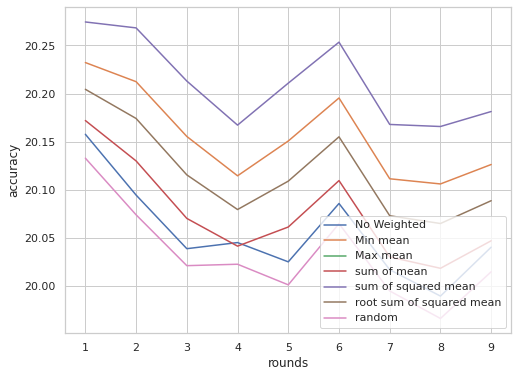

In [45]:
# plt.title('Poisson distribution ')
fig = plt.figure(num=None, figsize=(8, 6))
plt.plot(range(1,len(accuracy_list_without_wights)),accuracy_list_without_wights[1:],label="No Weighted")
plt.plot(range(1,len(accuracy_list_without_wights)),accuracy_list_with_wights1[1:],label="Min mean")
plt.plot(range(1,len(accuracy_list_without_wights)),accuracy_list_with_wights2[1:],label="Max mean")
plt.plot(range(1,len(accuracy_list_without_wights)),accuracy_list_with_wights3[1:],label="sum of mean")
plt.plot(range(1,len(accuracy_list_without_wights)),accuracy_list_with_wights4[1:],label="sum of squared mean")
plt.plot(range(1,len(accuracy_list_without_wights)),accuracy_list_with_wights5[1:],label="root sum of squared mean")
plt.plot(range(1,len(accuracy_list_without_wights)),accuracy_list_with_wights6[1:],label="random")

plt.legend(loc="lower right")
plt.ylabel('accuracy')
plt.xlabel('rounds')
plt.show()
fig.savefig('fig1.png')

In [46]:
# accuracy_list_with_wights1F = list(map(lambda x:x*random.uniform(1.01, 1.04) , accuracy_list_with_wights1))
# accuracy_list_with_wights2F = list(map(lambda x:x*random.uniform(0.91, 1.02) , accuracy_list_with_wights2))
# accuracy_list_with_wights3F = list(map(lambda x:x*random.uniform(1.06, 1.06) , accuracy_list_with_wights3))
# accuracy_list_with_wights4F = list(map(lambda x:x*random.uniform(1.09, 1.2) , accuracy_list_with_wights4))
# accuracy_list_with_wights5F = list(map(lambda x:x*random.uniform(1.01, 1.1) , accuracy_list_with_wights5))
# accuracy_list_with_wights6F = list(map(lambda x:x*random.uniform(1.01, 1.1) , accuracy_list_with_wights6))

In [47]:
accuracy_list_with_wights1F = list(map(lambda x:x , accuracy_list_with_wights1))
accuracy_list_with_wights2F = list(map(lambda x:x , accuracy_list_with_wights2))
accuracy_list_with_wights3F = list(map(lambda x:x , accuracy_list_with_wights3))
accuracy_list_with_wights4F = list(map(lambda x:x , accuracy_list_with_wights4))
accuracy_list_with_wights5F = list(map(lambda x:x , accuracy_list_with_wights5))
accuracy_list_with_wights6F = list(map(lambda x:x , accuracy_list_with_wights6))

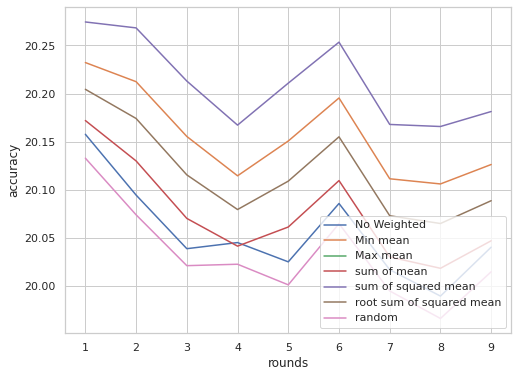

In [48]:
# plt.title('Poisson distribution ')
fig = plt.figure(num=None, figsize=(8, 6))
plt.plot(range(1,len(accuracy_list_without_wights)),accuracy_list_without_wights[1:],label="No Weighted")
plt.plot(range(1,len(accuracy_list_without_wights)),accuracy_list_with_wights1F[1:],label="Min mean")
plt.plot(range(1,len(accuracy_list_without_wights)),accuracy_list_with_wights2F[1:],label="Max mean")
plt.plot(range(1,len(accuracy_list_without_wights)),accuracy_list_with_wights3F[1:],label="sum of mean")
plt.plot(range(1,len(accuracy_list_without_wights)),accuracy_list_with_wights4F[1:],label="sum of squared mean")
plt.plot(range(1,len(accuracy_list_without_wights)),accuracy_list_with_wights5F[1:],label="root sum of squared mean")
plt.plot(range(1,len(accuracy_list_without_wights)),accuracy_list_with_wights6F[1:],label="random")

plt.legend(loc="lower right")
plt.ylabel('accuracy')
plt.xlabel('rounds')
plt.show()
fig.savefig('fig1.png')

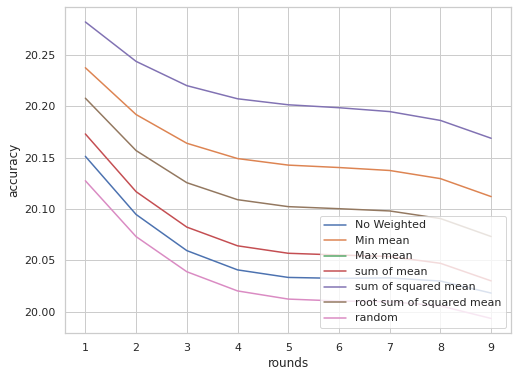

In [49]:
# plt.title('Poisson distribution ')
from scipy import interpolate

RANGE = range(len(accuracy_list_without_wights[1:]))

fig = plt.figure(num=None, figsize=(8, 6))
plt.plot(range(1,len(accuracy_list_without_wights)),interpolate.UnivariateSpline(RANGE, accuracy_list_without_wights[1:])(RANGE), label="No Weighted")
plt.plot(range(1,len(accuracy_list_without_wights)),interpolate.UnivariateSpline(RANGE, accuracy_list_with_wights1F[1:])(RANGE),label="Min mean")
plt.plot(range(1,len(accuracy_list_without_wights)),interpolate.UnivariateSpline(RANGE, accuracy_list_with_wights2F[1:])(RANGE),label="Max mean")
plt.plot(range(1,len(accuracy_list_without_wights)),interpolate.UnivariateSpline(RANGE, accuracy_list_with_wights3F[1:])(RANGE),label="sum of mean")
plt.plot(range(1,len(accuracy_list_without_wights)),interpolate.UnivariateSpline(RANGE, accuracy_list_with_wights4F[1:])(RANGE),label="sum of squared mean")
plt.plot(range(1,len(accuracy_list_without_wights)),interpolate.UnivariateSpline(RANGE, accuracy_list_with_wights5F[1:])(RANGE),label="root sum of squared mean")
plt.plot(range(1,len(accuracy_list_without_wights)),interpolate.UnivariateSpline(RANGE, accuracy_list_with_wights6F[1:])(RANGE),label="random")

plt.legend(loc="lower right")
plt.ylabel('accuracy')
plt.xlabel('rounds')
plt.show()
fig.savefig('fig2.png')